<img src='images/cover.jfif' alt='MIA' style="width:1400px;height:500px;">

# CONTENT
> [1- INTRODUCION TO YOLO](#1)
>>- [1.1- What is Object detection.](#1.1)
>>- [1.2- What is YOLO.](#1.2)
>>- [1.3- Why YOLO.](#1.3)
>>- [1.4- How Yolo Works](#1.4)

> [2- DRIVE MODEL](#2)
>>- [2.1- Import Library](#2.1)
>>- [2.2- Load Model Directory](#2.2)
>>- [2.3- Load Labels file](#2.3)
>>- [2.4- Load YOLO object detection](#2.4)
>>- [2.5- Get output Layer](#2.5)
>>- [2.6- Read image as blob](#2.6)
>>- [2.7- Pass Image to YOLO detector](#2.7)
>>- [2.8- Filtering output candidates](#2.8)
>>- [2.9- Non-maximums suppression problem](#2.9)


<a name='1'></a>
## 1-INTRODUCTION TO YOLO

YOLO is an algorithm that uses neural networks to provide real-time object detection. This algorithm is popular because of its speed and accuracy. It has been used in various applications to detect traffic signals, people, parking meters, and animals.

<a name='1.1'></a>
### 1.1- WHAT IS OBJECT DETECTION

Object detection is a phenomenon in computer vision that involves the detection of various objects in digital images or videos. Some of the objects detected include people, cars, chairs, stones, buildings, and animals.

This phenomenon seeks to answer two basic questions:

1. What is the object? This question seeks to identify the object in a specific image.
2. Where is it? This question seeks to establish the exact location of the object within the image.


Object detection consists of various approaches such as <u>fast R-CNN</u>, <u>Retina-Net</u>, and <u>Single-Shot MultiBox Detector (SSD)</u>. Although these approaches have solved the challenges of data limitation and modeling in object detection, they are not able to detect objects in a single algorithm run. YOLO algorithm has gained popularity because of its superior performance over the aforementioned object detection techniques.

<img src='images/class_vs_detect.jfif' alt='MIA' style="width:900px;height:500px;">

<a name='1.2'></a>
### 1.2- WHAT IS YOLO

YOLO is an abbreviation for the term ‘You Only Look Once’. This is an algorithm that detects and recognizes various objects in a picture (in real-time). Object detection in YOLO is done as a regression problem and provides the class probabilities of the detected images.

YOLO algorithm employs convolutional neural networks (CNN) to detect objects in real-time. As the name suggests, the algorithm requires only a single forward propagation through a neural network to detect objects.

This means that prediction in the entire image is done in a single algorithm run. The CNN is used to predict various class probabilities and bounding boxes simultaneously.

The YOLO algorithm consists of various variants. Some of the common ones include tiny YOLO and YOLOv3.

<a name='1.3'></a>
### 1.3- WHY YOLO

YOLO algorithm is important because of the following reasons:

* <strong>Speed:</strong> This algorithm improves the speed of detection because it can predict objects in real-time.
* <strong>High accuracy:</strong> YOLO is a predictive technique that provides accurate results with minimal background errors.
* <strong>Learning capabilities:</strong> The algorithm has excellent learning capabilities that enable it to learn the representations of objects and apply them in object detection.

<img src='images/yolo_vs_others.png' alt='Yolo vs' style="width:900px;height:500px;">

<a name='1.4'></a>
### 1.4-HOW YOLO WORKS

YOLO algorithm works using the following three techniques:

* Residual blocks
* Bounding box regression
* Intersection Over Union (IOU)

##### <strong>RESIDUAL BLOCKS</strong>
First, the image is divided into various grids. Each grid has a dimension of S x S. The following image shows how an input image is divided into grids.


<img src='images/grids.png' alt='grids' style="width:900px;height:500px;">

In the image above, there are many grid cells of equal dimension. Every grid cell will detect objects that appear within them. For example, if an object center appears within a certain grid cell, then this cell will be responsible for detecting it.

##### BOUNDING BOX
A bounding box is an outline that highlights an object in an image.

Every bounding box in the image consists of the following attributes:

* Width (bw)
* Height (bh)
* Class (c).


<img src='images/bounding-box.png' alt='grids' style="width:900px;height:500px;">

<a name='2'></a>
## 2-DRIVE MODEL

### 2.1- Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2 
import os

***
<a name='2.2'></a>
### 2.2- Load Model Directory

* Load Labels file
* Load weight file
* Load configuration

In [ ]:
labels_path  = 'ball_files/model.names'
weights_path = 'ball_files/model.weights'
config_path  = 'ball_files/model.cfg'

***
<a name='2.3'></a>
### 2.3- Load Labels file

* Load labels (classes) of Deep neural network 
* Define color for each class

In [ ]:
np.random.seed(42)
LABELS  = open(labels_path).read().strip().split('\n')
COLORS  = np.random.randint(0, 255, size=(len(LABELS),3), dtype='uint8')

***
<a name='2.4'></a>
### 2.4- Load Yolo object detection

* Load Configurations and Weights file to OpenCV dnn object

In [ ]:
net    =  cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [ ]:
len(net.getLayerNames())

***
<a name='2.5'></a>
### 2.5- Get Output layers

In [ ]:
ln     =  net.getLayerNames()
ln     =  [ln[i - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
net.getUnconnectedOutLayers()

***
<a name='2.6'></a>
### 2.6- Read Image as blob

<img src='images/blob_image.png' alt='Blob image' style="width:1000px;height:300px;">

To obtain correct predictions from Deep neural networks you first need to preprocess your data, in context of deep learning and image classification, these preprocessing tasks normally involve:
>* Mean Subtraction.
>* Scaling by some factor.


<br>
OpenCV's new deep neural network <strong>dnn</strong> module contains two 
functions that can be used for preprocessing images and preparing them for classificatino via- pre-trained deep leaning models.
<br>
OpenCV provides  functions to facilitate image preprocessing for deep learning classifications: cv2.dnn.blobFromImage.


<strong>This function perform:</strong>
<ol>
    <li>Mean Subtraction</li>
    <li>Scaling</li>
    <li>Resizing</li>
    <li>Channel swapping</li>
</ol>

In [ ]:
image_BGR  =  cv2.imread('data/b_021.jpg')
H, W = image_BGR.shape[:2]
image_BGR.shape

In [ ]:
# show the output image
plt.figure(figsize=(15,9))
plt.title('Image before conversion to RBG')
plt.axis(False)
plt.imshow(image_BGR)
plt.show()

In [ ]:
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

In [ ]:
# show the output image
plt.figure(figsize=(15,9))
plt.title('Image after conversion to RBG')
plt.axis(False)
plt.imshow(image_RGB)
plt.show()

In [ ]:
SCALE  =  1/255.0
SIZE   =  (320, 320)
blob   =  cv2.dnn.blobFromImage(image_BGR, scalefactor=SCALE, size=SIZE, swapRB=True, crop=False)
blob.shape

***
<a name='2.7'></a>
### 2.7- Input blob image to YOLO model

* Start compute time to get <strong>Inference Time</strong> of that model
* Pass image to the model

In [27]:
net.setInput(blob)
start = time.time()
LayerOutputs =  net.forward(ln)
end   = time.time()

In [28]:
print(f"Inference Time : {end-start} sec")

Inference Time : 1.171996831893921 sec


Data in Output layer is in order of (coordinate of Bounding box, Objectness score, Probability each class)

<img src='images/yolo_output_analysis.png' alt='Output image' style="width:900px;height:600px;">

In [29]:
LayerOutputs[0].shape

(19200, 8)

***
<a name='2.8'></a>
### 2.8- FILTERING OUTPUT CANDIDATES
* As we see output of YOLO model has many candidate most of them has very low probabilty we need to put threshold for probability that object exist to get the most promising candidate.
* We need also to get ID of the most score class 

In [30]:
OBJ_CONFIDENCE = 0.7
IOU_THRESH     = 0.25
boxes          = []
confidences    = []
classIDs       = []

In [31]:
for output in LayerOutputs:
    # Loop over each of the detections
    for detection in output:
        #extract the class ID and confidence of the current Object detection
        scores     =  detection[5:]
        classID    =  np.argmax(scores)
        confidence =  scores[classID]

        # filter weak pridictions 
        if confidence > OBJ_CONFIDENCE:
            # Scale the bounding box to size of image
            box = detection[:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype('int')
            x  = int(centerX - (width/2))
            y  = int(centerY - (height/2))

            # Update list of bounding box coordinates, confidances, and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [32]:
print(f'Boxes      : \n{boxes}')
print(f'Confidences: \n{confidences}')
print(f'ClassIDs   : \n{classIDs}')

Boxes      : 
[[698, 990, 462, 371], [713, 1014, 395, 373], [695, 1003, 431, 396], [736, 1016, 381, 365], [713, 1019, 427, 359], [754, 1016, 382, 362], [734, 1042, 381, 377], [669, 966, 471, 483], [642, 986, 534, 443], [665, 941, 493, 518], [712, 969, 425, 448], [741, 925, 364, 525], [728, 971, 398, 429], [699, 1004, 431, 412], [697, 859, 454, 699]]
Confidences: 
[0.8023765683174133, 0.8577921986579895, 0.9563648700714111, 0.9504106044769287, 0.9852362275123596, 0.8124468922615051, 0.7741820216178894, 0.9740542769432068, 0.9841110110282898, 0.9828534126281738, 0.9886007905006409, 0.9911499619483948, 0.9913091659545898, 0.8241697549819946, 0.9537617564201355]
ClassIDs   : 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


##### DRAW IMAGE
Draw image after filtering candidate

In [33]:
if len(classIDs) > 0:
	# loop over the indexes we are keeping
	for i in range(len(classIDs)):
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image_RGB, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.2f}%".format(LABELS[classIDs[i]], confidences[i]*100)
		cv2.putText(image_RGB, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)


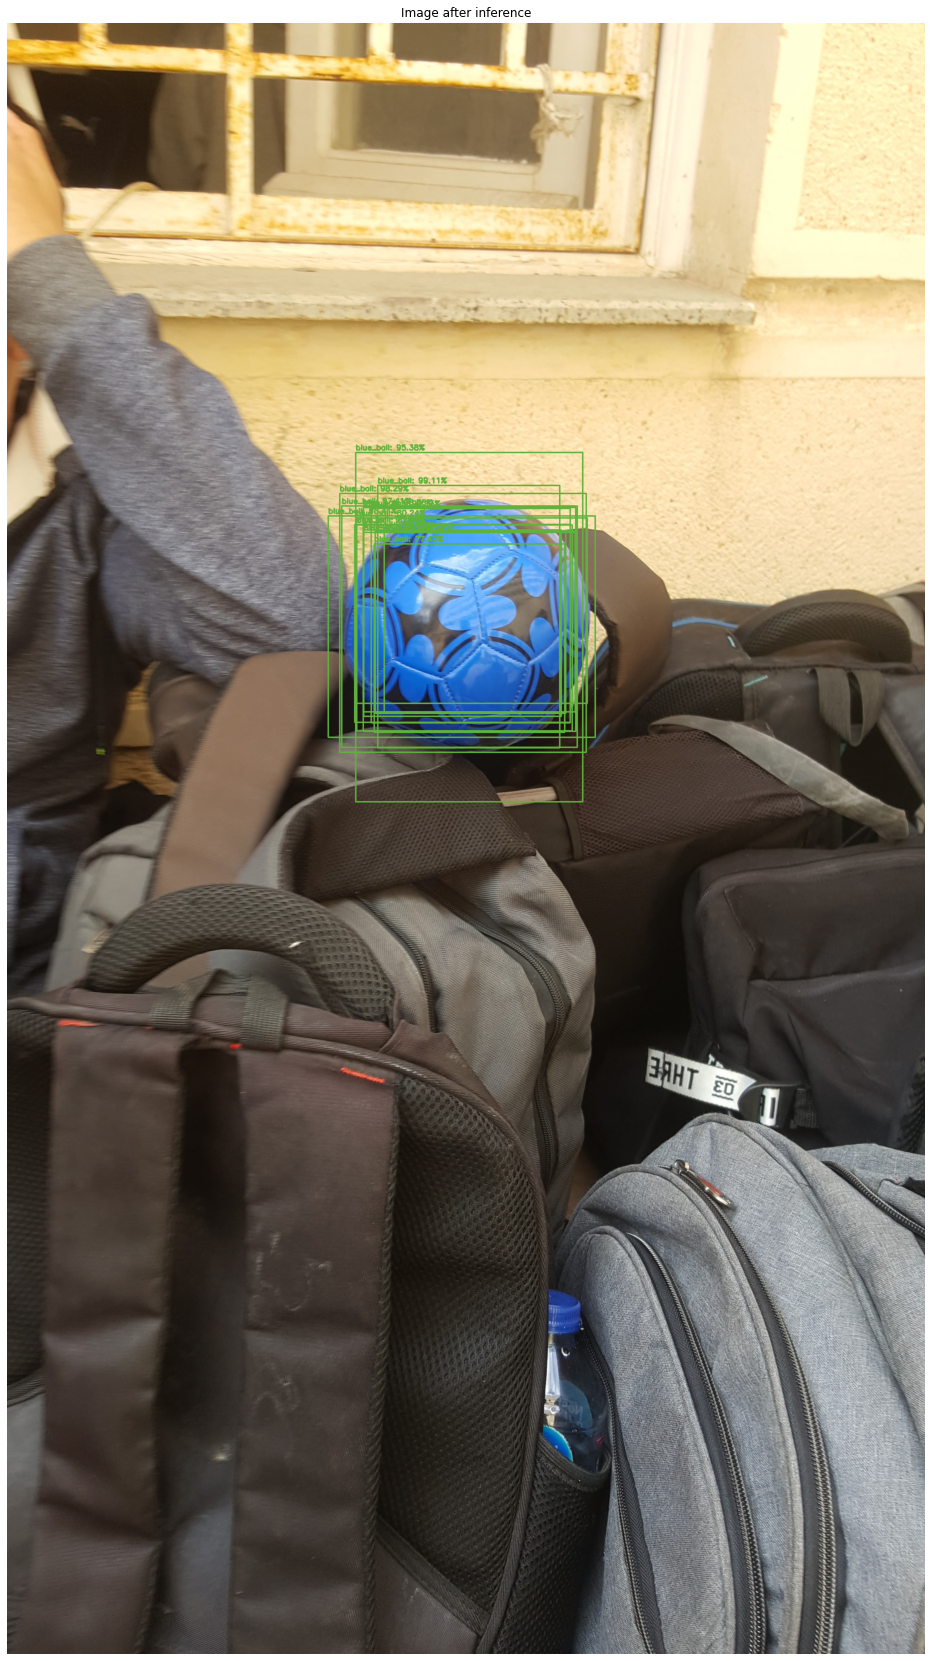

In [34]:
# show the output image
plt.figure(figsize=(25,30))
plt.title('Image after inference')
plt.axis(False)
plt.imshow(image_RGB)
plt.show()

***
<a name='2.9'></a>
### 2.9- NON-MAXIMUM SUPRRESSION PROBLEM


Non Maximum Suppression (NMS) is a technique used in numerous computer vision tasks. It is a class of algorithms to select one entity (e.g., bounding boxes) out of many overlapping entities. We can choose the selection criteria to arrive at the desired results. The criteria are most commonly some form of probability number and some form of overlap measure (e.g. Intersection over Union).

<img src='images/non_max_sup.jfif' alt='NMS' style="width:900px;height:600px;">

##### IOU
The Intersection over Union (IoU) metric, also referred to as the Jaccard index, is essentially a method used usually to quantify the percent overlap between the ground truth BBox (Bounding Box) and the prediction BBox. However, in NMS, we find IoU between two predictions BBoxes instead.

IoU in mathematical terms can be represented by the following expression,

Intersection Over Union(IoU) = (Target ∩ Prediction) / (Target U Prediction)


<img src='images/IOU.png' alt='IOU' style="width:900px;height:600px;">

In [35]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, OBJ_CONFIDENCE, IOU_THRESH)

In [36]:
NMS_image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(NMS_image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.2f}%".format(LABELS[classIDs[i]], confidences[i]*100)
		cv2.putText(NMS_image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

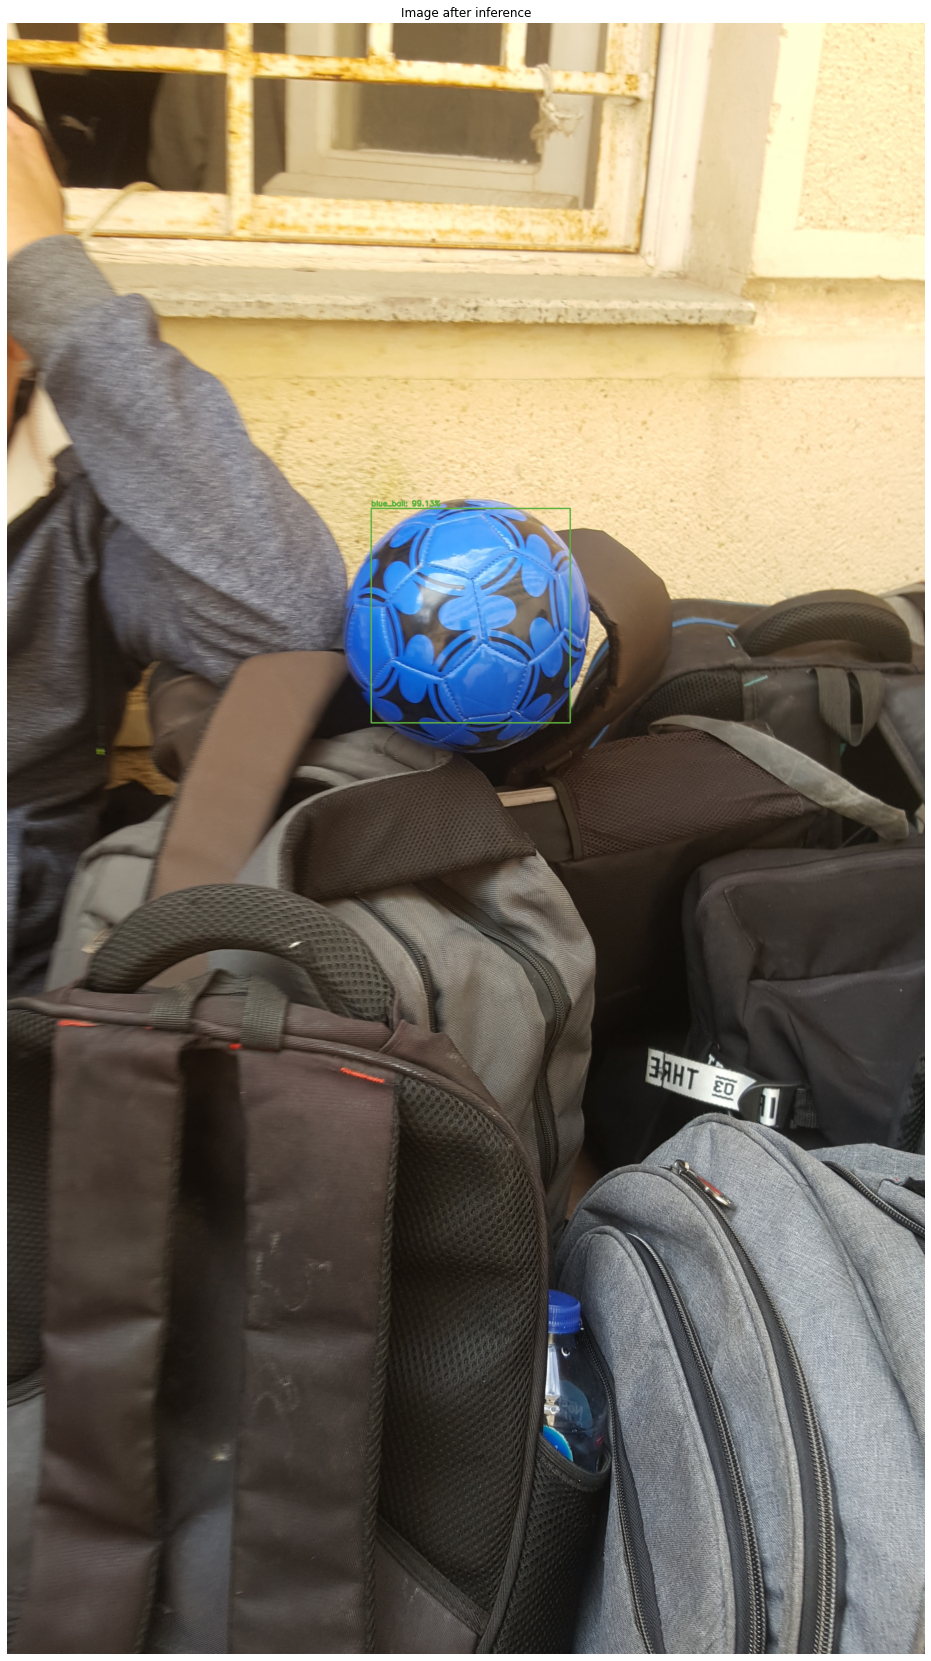

In [37]:
# show the output image
plt.figure(figsize=(25,30))
plt.title('Image after inference')
plt.axis(False)
plt.imshow(NMS_image)
plt.show()